In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import spacy
import string
from wordcloud import WordCloud
from textwrap import wrap
from textblob import TextBlob
import textstat
%matplotlib inline

In [12]:
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [13]:
data = pd.read_csv('twcs.csv')

In [4]:
data.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


In [40]:
authors = pd.DataFrame({'authors':[i for i in data['author_id'] if i.isalpha()]})

In [43]:
authors['authors'].value_counts().head(20)

AmazonHelp        169840
AppleSupport      106860
SpotifyCares       43265
Delta              42253
Tesco              38573
AmericanAir        36764
TMobileHelp        34317
comcastcares       33031
SouthwestAir       28977
VirginTrains       27817
XboxSupport        24557
sprintcare         22381
sainsburys         19466
GWRHelp            19364
AskPlayStation     19098
ChipotleTweets     18749
VerizonSupport     17966
UPSHelp            17817
ATVIAssist         17650
AskTarget          13218
Name: authors, dtype: int64

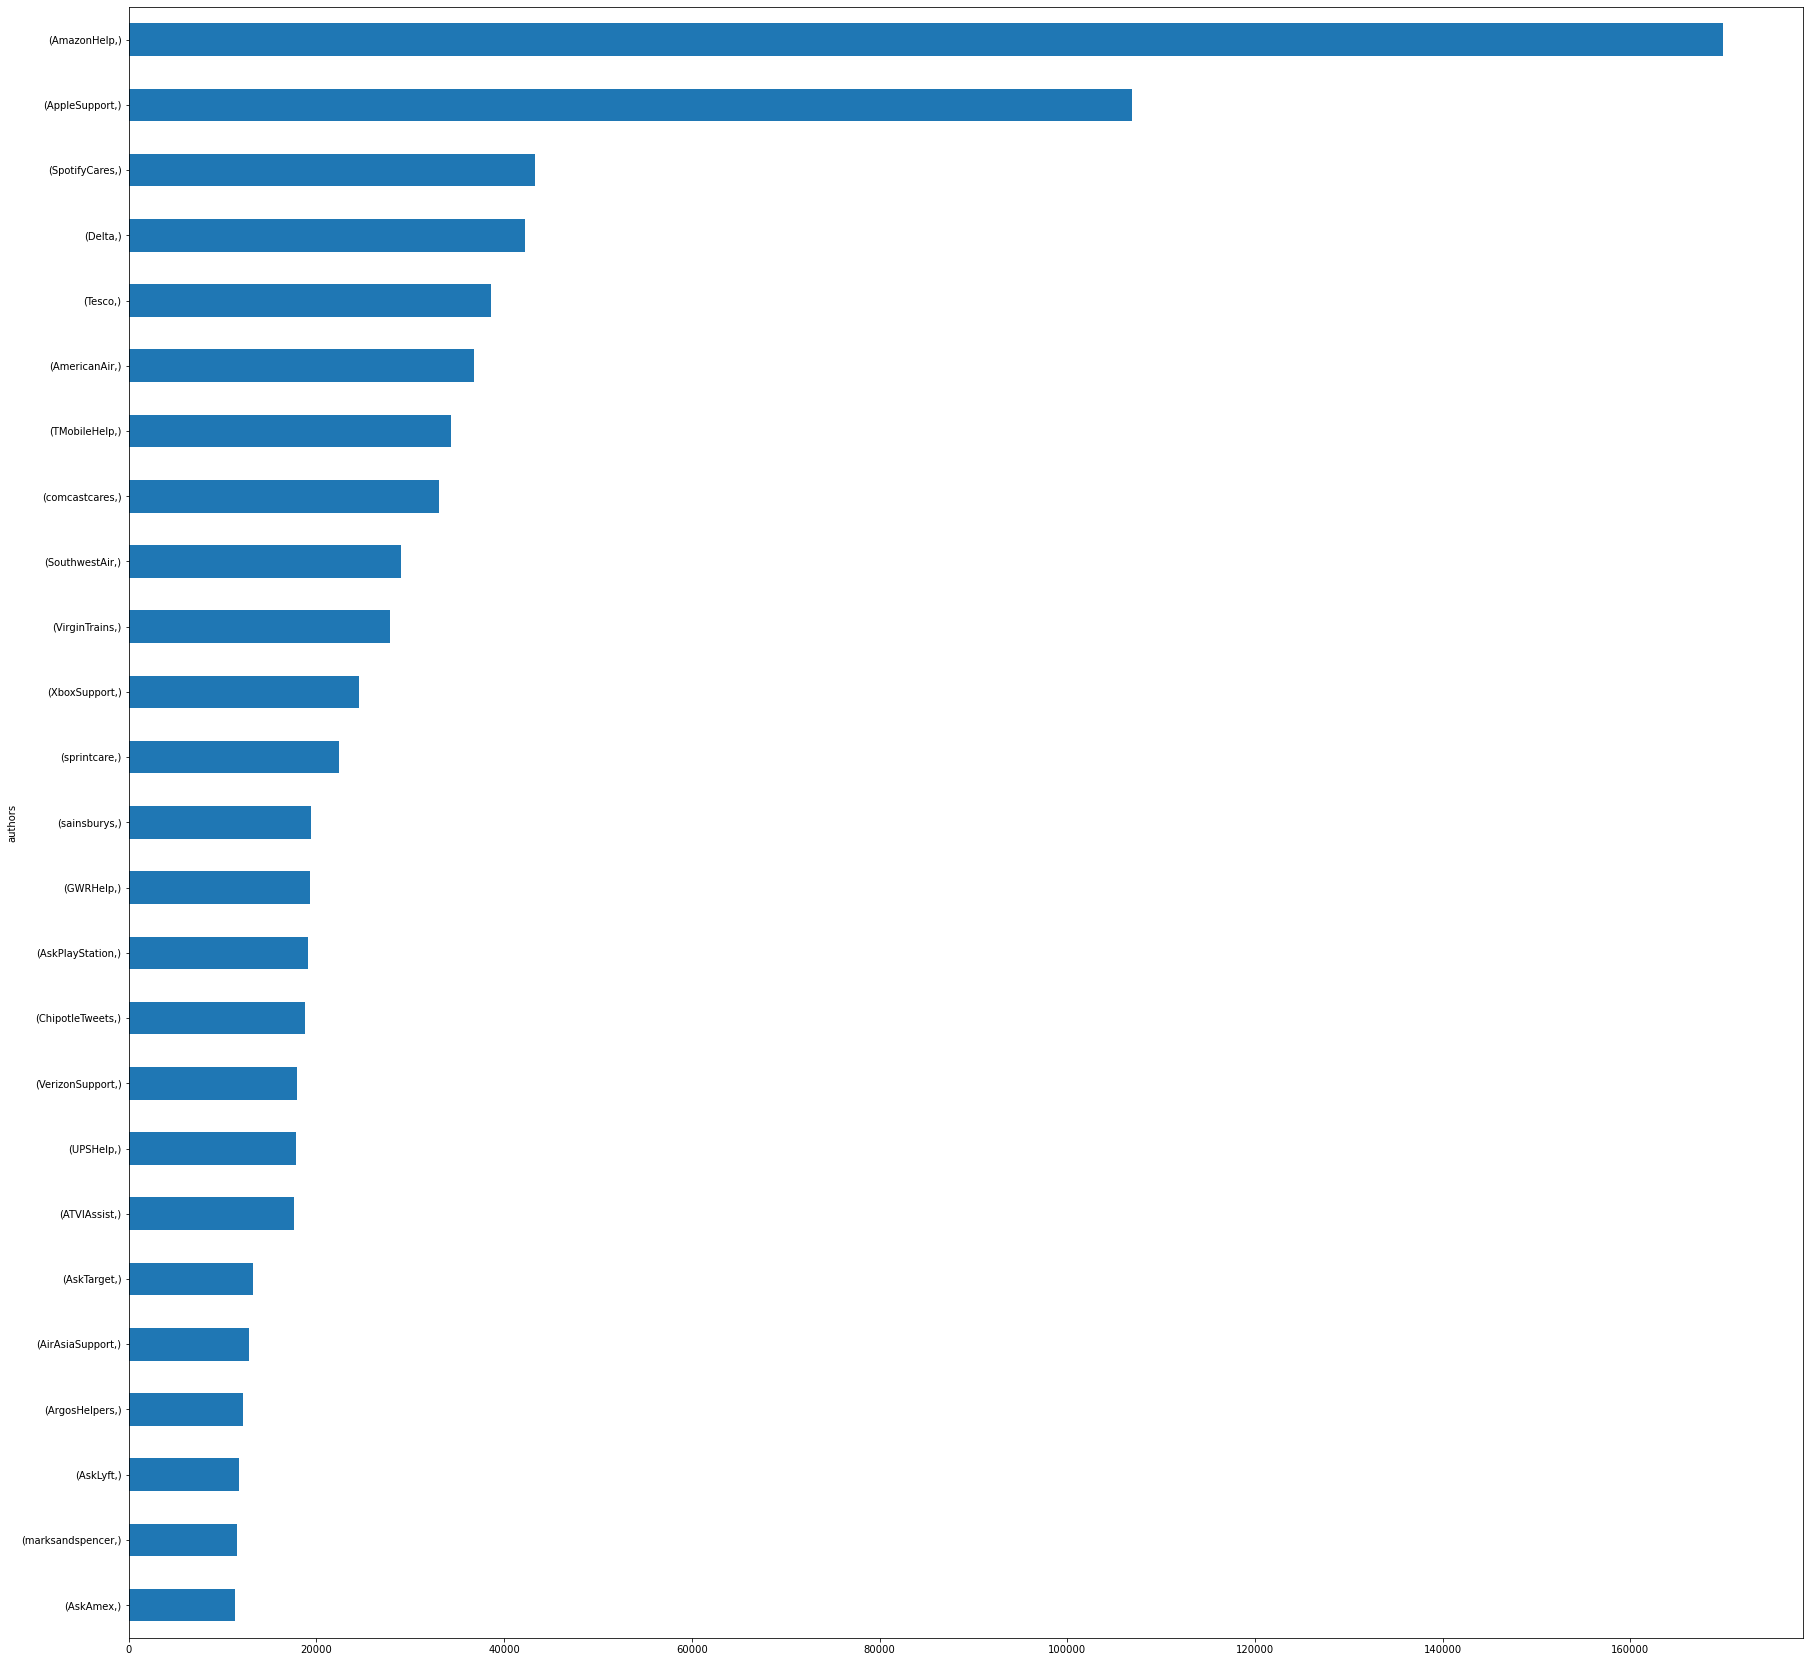

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (30,30))
authors.value_counts().head(25).sort_values().plot(kind = 'barh')
plt.rcParams.update({'font.size': 20})
plt.show()

In [165]:
"""
def sentiment(text):
    text = text.apply(lambda x: x.lower())
    text = text.apply(lambda x: re.sub('\w*\d\w*','', x))
    text = text.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
    nlp = spacy.load('en_core_web_sm')
    text = text.apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
    text_combined = ' '.join(text)
    return text_combined
"""

"\ndef sentiment(text):\n    text = text.apply(lambda x: x.lower())\n    text = text.apply(lambda x: re.sub('\\w*\\d\\w*','', x))\n    text = text.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))\n    nlp = spacy.load('en_core_web_sm')\n    text = text.apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))\n    text_combined = ' '.join(text)\n    return text_combined\n"

In [31]:
def sentiment_value(senti):
    if senti <= -0.35:
        return 'negative'
    elif senti <= 0.33:
        return 'neutral'
    else:
        return 'positive'

In [23]:
delta_reponse = pd.DataFrame(data[((data['author_id'] == 'Delta')  & (data['inbound'] == False))]['text'])
delta_reponse.reset_index(drop = True, inplace = True)

delta_reponse['text'] = delta_reponse['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

delta_reponse['text'] = delta_reponse['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

delta_reponse['text'] = delta_reponse['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
delta_reponse['text'] = delta_reponse['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [25]:
sentiment_analyzer = SentimentIntensityAnalyzer()

def sentiment_analyze(text: str) -> float:
    return sentiment_analyzer.polarity_scores(text)['compound']

In [26]:
# Analyze customer sentiment based on their messages
delta_reponse['sentiment'] = delta_reponse['text'].apply(sentiment_analyze)

In [32]:
delta_reponse['senti_nnp'] = delta_reponse['sentiment'].apply(sentiment_value)
delta_reponse['senti_nnp'] = delta_reponse['sentiment'].apply(sentiment_value)
delta_response_senti_final = delta_reponse.groupby(['senti_nnp']).size()
print(delta_response_senti_final)

In [37]:
print(delta_response_senti_final)

senti_nnp
negative     3287
neutral     16616
positive    22350
dtype: int64


In [44]:
american_air_response = pd.DataFrame(data[((data['author_id'] == 'AmericanAir')  & (data['inbound'] == False))]['text'])
american_air_response.reset_index(drop = True, inplace = True)

american_air_response['text'] = american_air_response['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

american_air_response['text'] = american_air_response['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

american_air_response['text'] = american_air_response['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
american_air_response['text'] = american_air_response['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


american_air_response['sentiment'] = american_air_response['text'].apply(sentiment_analyze)


american_air_response['senti_nnp'] = american_air_response['sentiment'].apply(sentiment_value)

american_air_response['senti_nnp'] = american_air_response['sentiment'].apply(sentiment_value)
american_air_response_senti_final = american_air_response.groupby(['senti_nnp']).size()

In [45]:
print(american_air_response_senti_final)

senti_nnp
negative     2337
neutral     14371
positive    20056
dtype: int64


In [46]:
southwest_air_response = pd.DataFrame(data[((data['author_id'] == 'SouthwestAir')  & (data['inbound'] == False))]['text'])
southwest_air_response.reset_index(drop = True, inplace = True)

southwest_air_response['text'] = southwest_air_response['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

southwest_air_response['text'] = southwest_air_response['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

southwest_air_response['text'] = southwest_air_response['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
southwest_air_response['text'] = southwest_air_response['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


southwest_air_response['sentiment'] = southwest_air_response['text'].apply(sentiment_analyze)


southwest_air_response['senti_nnp'] = southwest_air_response['sentiment'].apply(sentiment_value)

southwest_air_response['senti_nnp'] = southwest_air_response['sentiment'].apply(sentiment_value)
southwest_air_response_senti_final = southwest_air_response.groupby(['senti_nnp']).size()

In [47]:
print(southwest_air_response_senti_final)

senti_nnp
negative     2407
neutral      8639
positive    17931
dtype: int64


In [48]:
play_station_response = pd.DataFrame(data[((data['author_id'] == 'AskPlayStation')  & (data['inbound'] == False))]['text'])
play_station_response.reset_index(drop = True, inplace = True)

play_station_response['text'] = play_station_response['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

play_station_response['text'] = play_station_response['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

play_station_response['text'] = play_station_response['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
play_station_response['text'] = play_station_response['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


play_station_response['sentiment'] = play_station_response['text'].apply(sentiment_analyze)


play_station_response['senti_nnp'] = play_station_response['sentiment'].apply(sentiment_value)

play_station_response['senti_nnp'] = play_station_response['sentiment'].apply(sentiment_value)
play_station_response_senti_final = play_station_response.groupby(['senti_nnp']).size()

In [49]:
print(play_station_response_senti_final)

senti_nnp
negative     2012
neutral     10226
positive     6860
dtype: int64


In [50]:
chipotle_response = pd.DataFrame(data[((data['author_id'] == 'ChipotleTweets')  & (data['inbound'] == False))]['text'])
chipotle_response.reset_index(drop = True, inplace = True)

chipotle_response['text'] = chipotle_response['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

chipotle_response['text'] = chipotle_response['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

chipotle_response['text'] = chipotle_response['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
chipotle_response['text'] = chipotle_response['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


chipotle_response['sentiment'] = chipotle_response['text'].apply(sentiment_analyze)


chipotle_response['senti_nnp'] = chipotle_response['sentiment'].apply(sentiment_value)

chipotle_response['senti_nnp'] = chipotle_response['sentiment'].apply(sentiment_value)
chipotle_response_senti_final = chipotle_response.groupby(['senti_nnp']).size()

In [51]:
print(chipotle_response_senti_final)

senti_nnp
negative     1770
neutral     10452
positive     6527
dtype: int64


In [52]:
target_response = pd.DataFrame(data[((data['author_id'] == 'AskTarget')  & (data['inbound'] == False))]['text'])
target_response.reset_index(drop = True, inplace = True)

target_response['text'] = target_response['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

target_response['text'] = target_response['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

target_response['text'] = target_response['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
target_response['text'] = target_response['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


target_response['sentiment'] = target_response['text'].apply(sentiment_analyze)


target_response['senti_nnp'] = target_response['sentiment'].apply(sentiment_value)

target_response['senti_nnp'] = target_response['sentiment'].apply(sentiment_value)
target_response_senti_final = target_response.groupby(['senti_nnp']).size()

In [53]:
print(target_response_senti_final)

senti_nnp
negative     337
neutral     2980
positive    9901
dtype: int64


In [54]:
spotify_response = pd.DataFrame(data[((data['author_id'] == 'SpotifyCares')  & (data['inbound'] == False))]['text'])
spotify_response.reset_index(drop = True, inplace = True)

spotify_response['text'] = spotify_response['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

spotify_response['text'] = spotify_response['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

spotify_response['text'] = spotify_response['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
spotify_response['text'] = spotify_response['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


spotify_response['sentiment'] = spotify_response['text'].apply(sentiment_analyze)


spotify_response['senti_nnp'] = spotify_response['sentiment'].apply(sentiment_value)

spotify_response['senti_nnp'] = spotify_response['sentiment'].apply(sentiment_value)
spotify_response_senti_final = spotify_response.groupby(['senti_nnp']).size()

In [55]:
print(spotify_response_senti_final)

senti_nnp
negative     1232
neutral     18243
positive    23790
dtype: int64


In [56]:
lyft_response = pd.DataFrame(data[((data['author_id'] == 'AskLyft')  & (data['inbound'] == False))]['text'])
lyft_response.reset_index(drop = True, inplace = True)

lyft_response['text'] = lyft_response['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

lyft_response['text'] = lyft_response['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

lyft_response['text'] = lyft_response['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
lyft_response['text'] = lyft_response['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


lyft_response['sentiment'] = lyft_response['text'].apply(sentiment_analyze)


lyft_response['senti_nnp'] = lyft_response['sentiment'].apply(sentiment_value)

lyft_response['senti_nnp'] = lyft_response['sentiment'].apply(sentiment_value)
lyft_response_senti_final = lyft_response.groupby(['senti_nnp']).size()

In [57]:
print(lyft_response_senti_final)

senti_nnp
negative     458
neutral     7338
positive    4013
dtype: int64


In [76]:
amazon_response = pd.DataFrame(data[((data['author_id'] == 'AmazonHelp')  & (data['inbound'] == False))]['text'])
amazon_response.reset_index(drop = True, inplace = True)

amazon_response['text'] = amazon_response['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

amazon_response['text'] = amazon_response['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

amazon_response['text'] = amazon_response['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
amazon_response['text'] = amazon_response['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


amazon_response['sentiment'] = amazon_response['text'].apply(sentiment_analyze)


amazon_response['senti_nnp'] = amazon_response['sentiment'].apply(sentiment_value)

amazon_response['senti_nnp'] = amazon_response['sentiment'].apply(sentiment_value)
amazon_response_senti_final = amazon_response.groupby(['senti_nnp']).size()

In [77]:
print(amazon_response_senti_final)

senti_nnp
negative    15087
neutral     95414
positive    59339
dtype: int64


In [78]:
apple_response = pd.DataFrame(data[((data['author_id'] == 'AppleSupport')  & (data['inbound'] == False))]['text'])
apple_response.reset_index(drop = True, inplace = True)

apple_response['text'] = apple_response['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

apple_response['text'] = apple_response['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

apple_response['text'] = apple_response['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
apple_response['text'] = apple_response['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


apple_response['sentiment'] = apple_response['text'].apply(sentiment_analyze)


apple_response['senti_nnp'] = apple_response['sentiment'].apply(sentiment_value)

apple_response['senti_nnp'] = apple_response['sentiment'].apply(sentiment_value)
apple_response_senti_final = apple_response.groupby(['senti_nnp']).size()

In [79]:
print(apple_response_senti_final)

senti_nnp
negative      850
neutral     33008
positive    73002
dtype: int64


In [156]:
apple_response.head()

,text,sentiment,senti_nnp
0,version io run check setting gt general gt,0.4939,positive
1,let close look issue select follow link join...,0.2960,neutral
2,let dm step dm httpstco,0.0000,neutral
3,step try start night,0.0000,neutral
4,s great ios rule outdat step try start rec...,0.6249,positive


In [157]:
apple_queries.head()

,text,sentiment,senti_nnp
0,applesupport new update i️ sure download yeste...,0.3182,neutral
1,applesupport httpstco,0.0000,neutral
2,applesupport i️ ’s change show correctly socia...,0.0000,neutral
3,applesupport try reset setting restart phone,0.0000,neutral
4,applesupport look like httpstco,0.3612,positive


In [80]:
delta_queries = []
for i in data['text']:
    if '@Delta' in i:
        delta_queries.append(i)
        
american_air_queries = []
for i in data['text']:
    if '@AmericanAir' in i:
        american_air_queries.append(i)

south_west_air_queries = []
for i in data['text']:
    if '@SouthwestAir' in i:
        south_west_air_queries.append(i)
        
play_station_queries = []
for i in data['text']:
    if '@AskPlayStation' in i:
        play_station_queries.append(i)
        
chipotle_queries = []
for i in data['text']:
    if '@ChipotleTweets' in i:
        chipotle_queries.append(i)
        
target_queries = []
for i in data['text']:
    if '@AskTarget' in i:
        target_queries.append(i)

spotify_queries = []
for i in data['text']:
    if '@SpotifyCares' in i:
        spotify_queries.append(i)
        
lyft_queries = []
for i in data['text']:
    if '@AskLyft' in i:
        lyft_queries.append(i)
        
amazon_queries = []
for i in data['text']:
    if '@AmazonHelp' in i:
        amazon_queries.append(i)
        
apple_queries = []
for i in data['text']:
    if '@AppleSupport' in i:
        apple_queries.append(i)

In [81]:
delta_queries = pd.DataFrame(delta_queries,columns = ['text'])

american_air_queries = pd.DataFrame(american_air_queries,columns = ['text'])

south_west_air_queries = pd.DataFrame(south_west_air_queries,columns = ['text'])

play_station_queries = pd.DataFrame(play_station_queries,columns = ['text'])

chipotle_queries = pd.DataFrame(chipotle_queries,columns = ['text'])

target_queries = pd.DataFrame(target_queries,columns = ['text'])

spotify_queries = pd.DataFrame(spotify_queries,columns = ['text'])

lyft_queries = pd.DataFrame(lyft_queries,columns = ['text'])

amazon_queries = pd.DataFrame(amazon_queries,columns = ['text'])

apple_queries = pd.DataFrame(apple_queries,columns = ['text'])

In [98]:
delta_queries['text'] = delta_queries['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

delta_queries['text'] = delta_queries['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

delta_queries['text'] = delta_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
delta_queries['text'] = delta_queries['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

delta_queries['sentiment'] = delta_queries['text'].apply(sentiment_analyze)


delta_queries['senti_nnp'] = delta_queries['sentiment'].apply(sentiment_value)

delta_queries['senti_nnp'] = delta_queries['sentiment'].apply(sentiment_value)
delta_queries_senti_final = delta_queries.groupby(['senti_nnp']).size()

In [99]:
print(delta_queries_senti_final)

senti_nnp
negative     5792
neutral     18961
positive    16526
dtype: int64


In [100]:
american_air_queries['text'] = american_air_queries['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

american_air_queries['text'] = american_air_queries['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

american_air_queries['text'] = american_air_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
american_air_queries['text'] = american_air_queries['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

american_air_queries['sentiment'] = american_air_queries['text'].apply(sentiment_analyze)


american_air_queries['senti_nnp'] = american_air_queries['sentiment'].apply(sentiment_value)

american_air_queries['senti_nnp'] = american_air_queries['sentiment'].apply(sentiment_value)
american_air_queries_senti_final = american_air_queries.groupby(['senti_nnp']).size()

In [101]:
print(american_air_queries_senti_final)

senti_nnp
negative     9529
neutral     22712
positive    16562
dtype: int64


In [102]:
south_west_air_queries['text'] = south_west_air_queries['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

south_west_air_queries['text'] = south_west_air_queries['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

south_west_air_queries['text'] = south_west_air_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
south_west_air_queries['text'] = south_west_air_queries['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

south_west_air_queries['sentiment'] = south_west_air_queries['text'].apply(sentiment_analyze)


south_west_air_queries['senti_nnp'] = south_west_air_queries['sentiment'].apply(sentiment_value)

south_west_air_queries['senti_nnp'] = south_west_air_queries['sentiment'].apply(sentiment_value)
south_west_air_queries_senti_final = south_west_air_queries.groupby(['senti_nnp']).size()

In [103]:
print(south_west_air_queries_senti_final)

senti_nnp
negative     4279
neutral     13877
positive    15351
dtype: int64


In [104]:
play_station_queries['text'] = play_station_queries['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

play_station_queries['text'] = play_station_queries['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

play_station_queries['text'] = play_station_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
play_station_queries['text'] = play_station_queries['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

play_station_queries['sentiment'] = play_station_queries['text'].apply(sentiment_analyze)


play_station_queries['senti_nnp'] = play_station_queries['sentiment'].apply(sentiment_value)

play_station_queries['senti_nnp'] = play_station_queries['sentiment'].apply(sentiment_value)
play_station_queries_senti_final = play_station_queries.groupby(['senti_nnp']).size()

In [105]:
print(play_station_queries_senti_final)

senti_nnp
negative     3604
neutral     12478
positive     6190
dtype: int64


In [106]:
chipotle_queries['text'] = chipotle_queries['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

chipotle_queries['text'] = chipotle_queries['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

chipotle_queries['text'] = chipotle_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
chipotle_queries['text'] = chipotle_queries['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

chipotle_queries['sentiment'] = chipotle_queries['text'].apply(sentiment_analyze)


chipotle_queries['senti_nnp'] = chipotle_queries['sentiment'].apply(sentiment_value)

chipotle_queries['senti_nnp'] = chipotle_queries['sentiment'].apply(sentiment_value)
chipotle_queries_senti_final = chipotle_queries.groupby(['senti_nnp']).size()

In [107]:
print(chipotle_queries_senti_final)

senti_nnp
negative     3698
neutral     10524
positive     7371
dtype: int64


In [108]:
target_queries['text'] = target_queries['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

target_queries['text'] = target_queries['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

target_queries['text'] = target_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
target_queries['text'] = target_queries['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

target_queries['sentiment'] = target_queries['text'].apply(sentiment_analyze)


target_queries['senti_nnp'] = target_queries['sentiment'].apply(sentiment_value)

target_queries['senti_nnp'] = target_queries['sentiment'].apply(sentiment_value)
target_queries_senti_final = target_queries.groupby(['senti_nnp']).size()

In [109]:
print(target_queries_senti_final)

senti_nnp
negative     815
neutral     3949
positive    2435
dtype: int64


In [110]:
spotify_queries['text'] = spotify_queries['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

spotify_queries['text'] = spotify_queries['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

spotify_queries['text'] = spotify_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
spotify_queries['text'] = spotify_queries['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

spotify_queries['sentiment'] = spotify_queries['text'].apply(sentiment_analyze)


spotify_queries['senti_nnp'] = spotify_queries['sentiment'].apply(sentiment_value)

spotify_queries['senti_nnp'] = spotify_queries['sentiment'].apply(sentiment_value)
spotify_queries_senti_final = spotify_queries.groupby(['senti_nnp']).size()

In [111]:
print(spotify_queries_senti_final)

senti_nnp
negative     3081
neutral     16865
positive    11024
dtype: int64


In [112]:
lyft_queries['text'] = lyft_queries['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

lyft_queries['text'] = lyft_queries['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

lyft_queries['text'] = lyft_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
lyft_queries['text'] = lyft_queries['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

lyft_queries['sentiment'] = lyft_queries['text'].apply(sentiment_analyze)


lyft_queries['senti_nnp'] = lyft_queries['sentiment'].apply(sentiment_value)

lyft_queries['senti_nnp'] = lyft_queries['sentiment'].apply(sentiment_value)
lyft_queries_senti_final = lyft_queries.groupby(['senti_nnp']).size()

In [113]:
print(lyft_queries_senti_final)

senti_nnp
negative    1142
neutral     3938
positive    2073
dtype: int64


In [82]:
amazon_queries['text'] = amazon_queries['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

amazon_queries['text'] = amazon_queries['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

amazon_queries['text'] = amazon_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
amazon_queries['text'] = amazon_queries['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

amazon_queries['sentiment'] = amazon_queries['text'].apply(sentiment_analyze)


amazon_queries['senti_nnp'] = amazon_queries['sentiment'].apply(sentiment_value)

amazon_queries['senti_nnp'] = amazon_queries['sentiment'].apply(sentiment_value)
amazon_queries_senti_final = amazon_queries.groupby(['senti_nnp']).size()

In [83]:
print(amazon_queries_senti_final)

senti_nnp
negative    17949
neutral     82355
positive    34443
dtype: int64


In [84]:
apple_queries['text'] = apple_queries['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

apple_queries['text'] = apple_queries['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

apple_queries['text'] = apple_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
apple_queries['text'] = apple_queries['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

apple_queries['sentiment'] = apple_queries['text'].apply(sentiment_analyze)


apple_queries['senti_nnp'] = apple_queries['sentiment'].apply(sentiment_value)

apple_queries['senti_nnp'] = apple_queries['sentiment'].apply(sentiment_value)
apple_queries_senti_final = apple_queries.groupby(['senti_nnp']).size()

In [85]:
print(apple_queries_senti_final)

senti_nnp
negative    18914
neutral     56051
positive    22189
dtype: int64


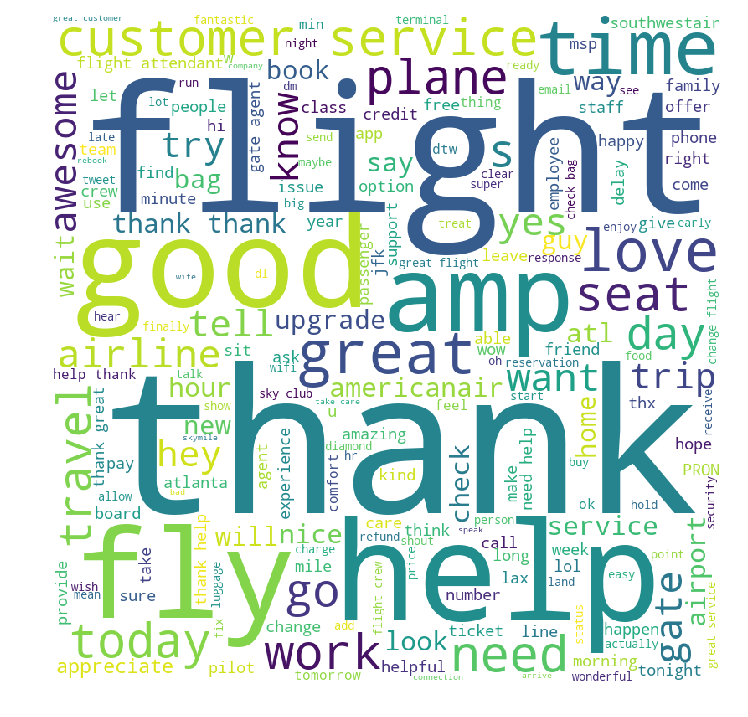

In [150]:
delta_text_combined = ' '.join(delta_queries[delta_queries['senti_nnp'] == 'positive']['text'])
delta_text_combined = delta_text_combined.replace('Delta', "").replace("delta", "").replace("httpstco", "").replace("https", "")
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(delta_text_combined)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [137]:
delta_positive_words = delta_text_combined.split(" ")
delta_positive_words = pd.DataFrame({'words' : delta_positive_words})
delta_positive_words['words'].value_counts().head(20)

            46309
thank        5503
flight       4405
help         2027
not          1798
good         1675
great        1453
fly          1311
be           1253
service      1234
seat         1042
get          1039
time         1026
customer     1016
like          996
love          857
amp           822
need          809
️             806
hour          744
Name: words, dtype: int64

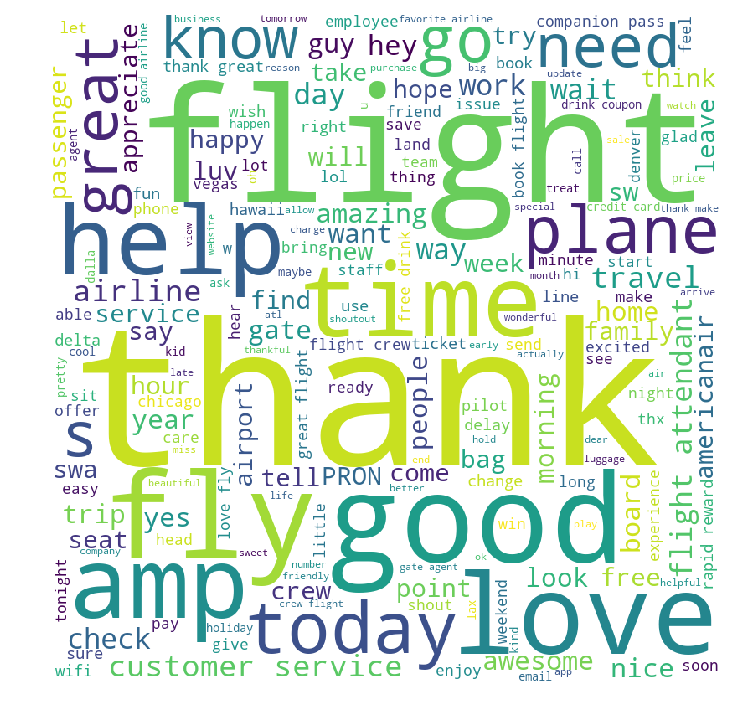

In [163]:
south_west_air_text_combined = ' '.join(south_west_air_queries[south_west_air_queries['senti_nnp'] == 'positive']['text'])
south_west_air_text_combined = south_west_air_text_combined.replace('southwestair', "").replace("southwest", "").replace("httpstco", "").replace("https", "")
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(south_west_air_text_combined)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
#plt.show()
plt.savefig('southwest_air_positive_queries.png')

In [164]:
south_west_air_positive_words = south_west_air_text_combined.split(" ")
south_west_air_positive_words = pd.DataFrame({'words' : south_west_air_positive_words})
south_west_air_positive_words['words'].value_counts().head(30)

            40359
thank        4570
flight       4268
fly          1812
good         1705
️            1483
love         1425
not          1421
great        1322
be           1092
get          1026
❤            1014
help          916
like          872
time          871
service       811
airline       793
amp           761
customer      722
plane         670
today         647
have          627
crew          626
free          620
guy           619
home          607
travel        563
day           551
check         545
go            532
Name: words, dtype: int64

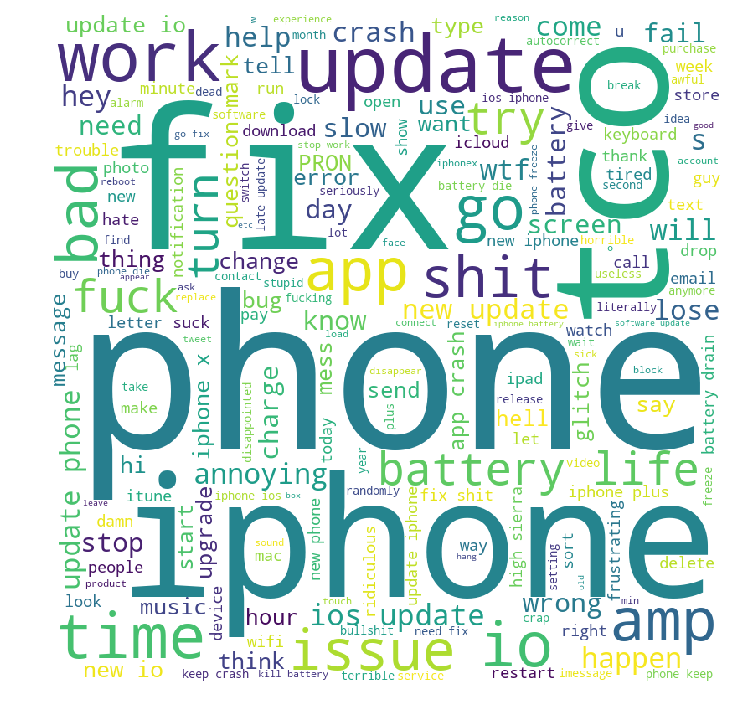

In [158]:
apple_text_combined = ' '.join(apple_queries[apple_queries['senti_nnp'] == 'negative']['text'])
apple_text_combined = apple_text_combined.replace('applesupport', "").replace("apple", "").replace("problem", "").replace("https", "")
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(apple_text_combined)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('apple_negative_queries.png')

In [159]:
apple_negative_words = apple_text_combined.split(" ")
apple_negative_words = pd.DataFrame({'words' : apple_negative_words})
apple_negative_words['words'].value_counts().head(30)

#apple_queries['text'] = apple_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

           62976
update      4889
phone       4680
not         4182
iphone      3903
ios         3610
fix         3208
i️          2676
battery     2429
’           2392
"           2363
tco         2077
be          2066
app         1970
new         1909
have        1685
time        1538
work        1445
crash       1403
get         1398
go          1348
shit        1233
bad         1193
try          972
issue        941
amp          857
screen       848
\n           833
😭            795
wtf          792
Name: words, dtype: int64

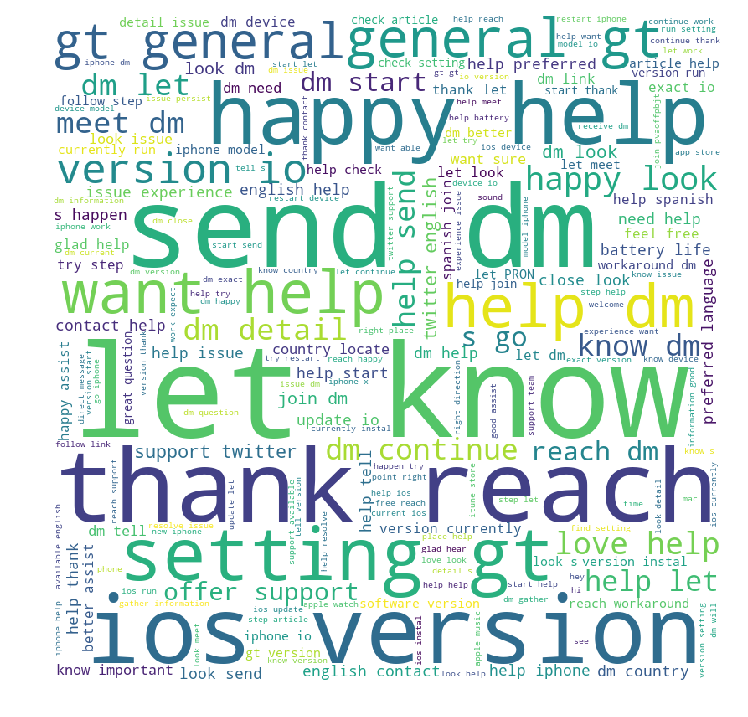

In [146]:
apple_res_text_combined = ' '.join(apple_response[apple_response['senti_nnp'] == 'positive']['text'])
apple_res_text_combined = apple_res_text_combined.replace('httpstco', "")#.replace("apple", "").replace("problem", "").replace("https", "")
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(apple_res_text_combined)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

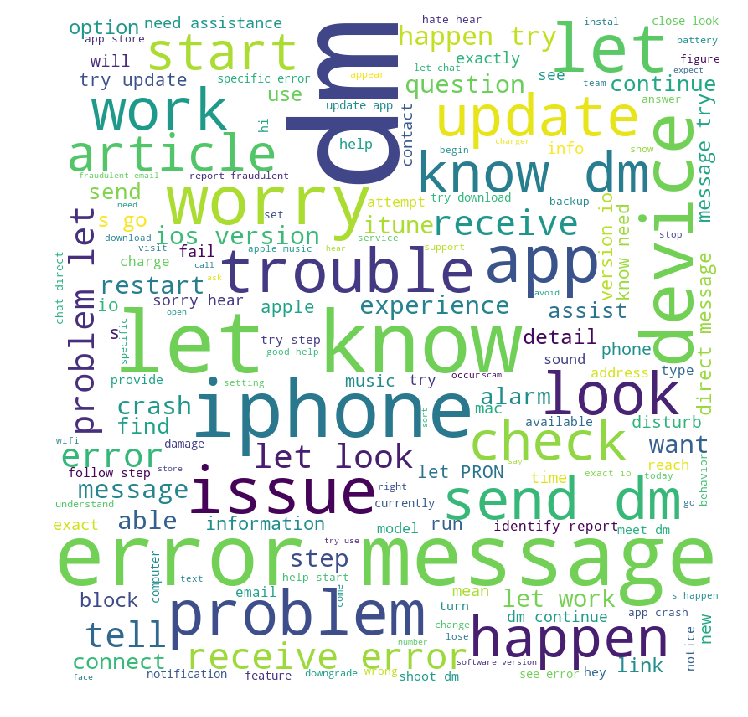

In [147]:
apple_res_text_combined = ' '.join(apple_response[apple_response['senti_nnp'] == 'negative']['text'])
apple_res_text_combined = apple_res_text_combined.replace('httpstco', "")#.replace("apple", "").replace("problem", "").replace("https", "")
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(apple_res_text_combined)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

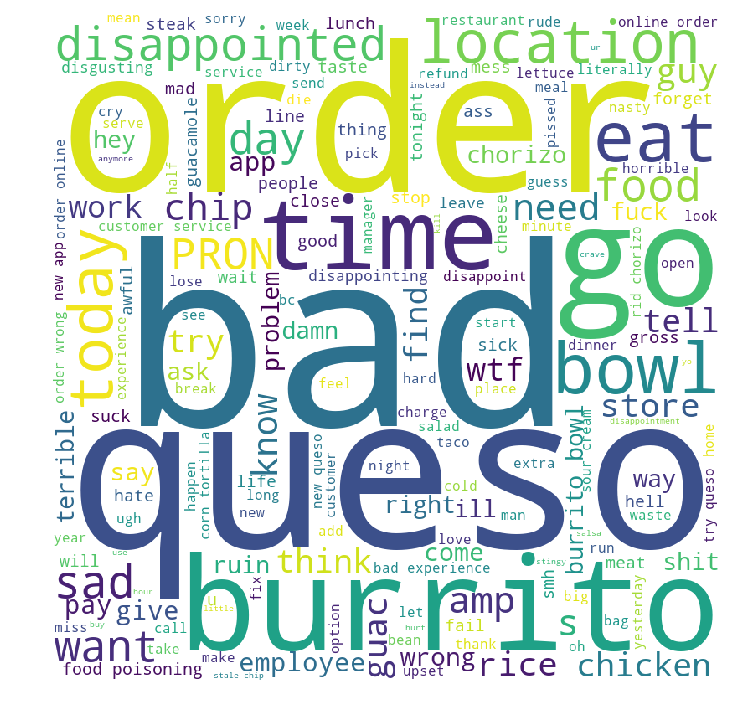

In [160]:
chipotle_text_combined = ' '.join(chipotle_queries[chipotle_queries['senti_nnp'] == 'negative']['text'])
chipotle_text_combined = chipotle_text_combined.replace('chipotletweet', "").replace("httpstco", "").replace("chipotle", "").replace("https", "")
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(chipotle_text_combined)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('chipotle_negative_queries.png')

In [161]:
chipotle_negative_words = chipotle_text_combined.split(" ")
chipotle_negative_words = pd.DataFrame({'words' : chipotle_negative_words})
chipotle_negative_words['words'].value_counts().head(30)

                7696
not              705
be               531
😭                504
order            494
queso            440
bad              413
get              382
bowl             352
burrito          345
time             293
go               257
food             246
eat              231
chip             222
’                209
have             206
location         182
disappointed     179
sad              174
today            173
app              170
try              167
day              164
chorizo          158
want             156
pay              146
😩                141
rice             140
-PRON-           139
Name: words, dtype: int64